# Data exploration

## Object detection

In [13]:
import os
import numpy as np
import pandas as pd

import cv2

from matplotlib import pyplot as plt
from matplotlib import patches
%matplotlib inline

In [4]:
root_dir = "/Stor1/wout/TreeAI4Species/ObjDet/"
dir_example = os.path.join(root_dir, "12_RGB_ObjDet_640_fL")

In [32]:
def label_file_to_list(label_file):
    # # format: class x_center y_center width height
    data = pd.read_csv(label_file, sep=" ", header=None)
    data.columns = ["label", "x_center", "y_center", "width", "height"]
    return data

def plot_image_with_boxes(image_file, label_file):
    # read image and bboxs
    bboxs = label_file_to_list(label_file)
    img = cv2.imread(image_file)

    # convert bboxs to image coordinates
    bboxs = xy_to_img_coordinates(bboxs, img)

    # plot
    fig, ax = plt.subplots()
    ax.imshow(img)
    for index, row in bboxs.iterrows():
        x = row["x_center"] - row["width"]/2
        y = row["y_center"] - row["height"]/2
        w = row["width"]
        h = row["height"]
        # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        rect = patches.Rectangle((x,y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x,y, int(row["label"]), fontsize=12, color="white", bbox=dict(facecolor='red', edgecolor="none"))
        
    plt.show()
    return  

def xy_to_img_coordinates(labels, img):
    height, width, _ = img.shape
    labels["x_center"] = labels["x_center"]*width
    labels["width"] = labels["width"]*width
    labels["y_center"] = labels["y_center"]*height
    labels["height"] = labels["height"]*height
    return labels


   label  x_center  y_center     width    height
0     52  0.956250  0.900781  0.087500  0.198437
1     24  0.989062  0.689063  0.021875  0.143750
2     24  0.069531  0.903125  0.139063  0.193750
3     48  0.259375  0.911719  0.256250  0.176563
4     24  0.614062  0.888281  0.371875  0.223438


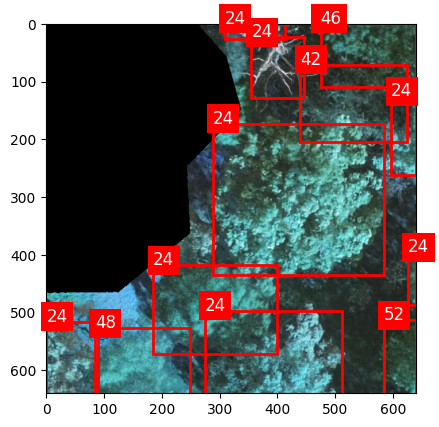

In [34]:
example_id = "000000001707"
# example_id = "000000001711"
label_file = os.path.join(dir_example, "train", "labels", f"{example_id}.txt")
img_file = os.path.join(dir_example, "train", "images", f"{example_id}.png")


print(label_file_to_list(label_file)[:5])
plot_image_with_boxes(img_file, label_file)